<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/BTC_USD_PREDICTION_WITH_INDICATORS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas_ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas_datareader as web
import pandas_ta as ta # This should work now that the library is installed
data = yf.download(tickers = 'BTC-USD', start = '2019-01-1', end = dt.datetime.now()) # Changed ticker to 'BTC-USD' and removed quotes around dt.datetime.now()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=4168f0e527daabee9e224d9ad369929dfa8fc124261e71cba68e68b8ec0a3534
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BTC-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2019-01-1 -> 2024-09-21 05:34:03.025587) (Yahoo error = "1h data not available for startTime=1546300800 and endTime=1726896843. The requested range must be within the last 730 days.")')


In [4]:
data = yf.download(tickers = 'BTC-USD', start = '2019-01-1', end = dt.datetime.now())

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [8]:
#adding indicators
data['RSI'] = ta.rsi(data['Close'], length = 15)
data['EMAF']=ta.ema(data.Close, lenght = 15)
data['EMAM']=ta.ema(data.Close, lenght = 100)
data['EMAS']=ta.ema(data.Close, lenght = 200)

In [10]:
data['Target'] = data['Adj Close']-data['Open']
data['Target'] = data['Target'].shift(-1)

In [14]:
data['Target'] = [1 if data['Target'][i]>0 else 0 for i in range(len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace = True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis = 1, inplace = True)

In [18]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)
data.head()

,index,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,0,3631.509766,3685.777100,3624.673340,3655.006836,40.418236,3728.807152,3728.807152,3728.807152,1,3678.563965
1,1,3651.871094,3680.135986,3621.960938,3678.563965,42.189659,3719.672027,3719.672027,3719.672027,0,3657.839355
2,2,3677.990479,3682.520020,3637.080811,3657.839355,41.039551,3708.429723,3708.429723,3708.429723,1,3728.568359
3,3,3652.377930,3758.533447,3652.377930,3728.568359,46.383984,3712.091293,3712.091293,3712.091293,0,3601.013672
4,4,3725.446045,3743.387939,3583.019531,3601.013672,39.470790,3691.895362,3691.895362,3691.895362,0,3576.032471


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 3.30281158e-03 3.66643562e-03 ... 3.96856141e-03
  1.00000000e+00 4.00511124e-03]
 [4.82625483e-04 3.59503192e-03 3.58621743e-03 ... 3.83016838e-03
  0.00000000e+00 3.70770293e-03]
 [9.65250965e-04 3.96989035e-03 3.62011904e-03 ... 3.65985255e-03
  1.00000000e+00 4.72269884e-03]
 ...
 [9.99034749e-01 8.00594898e-01 7.93172367e-01 ... 8.31219382e-01
  1.00000000e+00 8.16673042e-01]
 [9.99517375e-01 7.86347664e-01 8.23185370e-01 ... 8.36656945e-01
  1.00000000e+00 8.35919068e-01]
 [1.00000000e+00 8.16722993e-01 8.28133693e-01 ... 8.44799982e-01
  1.00000000e+00 8.54442356e-01]]


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
  X.append([])
  for i in range(backcandles, data_set_scaled.shape[0]):
    X[j].append(data_set_scaled[i-backcandles:i, j])
X=np.moveaxis(X, [0], [2]) # Move this line outside the loops to avoid converting X to a NumPy array within the loop
X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y=np.reshape(yi,(len(yi), 1))
print(X.shape)
print(y.shape)

[[0.00000000e+00 3.30281158e-03 3.66643562e-03 ... 3.96856141e-03
  1.00000000e+00 4.00511124e-03]
 [4.82625483e-04 3.59503192e-03 3.58621743e-03 ... 3.83016838e-03
  0.00000000e+00 3.70770293e-03]
 [9.65250965e-04 3.96989035e-03 3.62011904e-03 ... 3.65985255e-03
  1.00000000e+00 4.72269884e-03]
 ...
 [9.99034749e-01 8.00594898e-01 7.93172367e-01 ... 8.31219382e-01
  1.00000000e+00 8.16673042e-01]
 [9.99517375e-01 7.86347664e-01 8.23185370e-01 ... 8.36656945e-01
  1.00000000e+00 8.35919068e-01]
 [1.00000000e+00 8.16722993e-01 8.28133693e-01 ... 8.44799982e-01
  1.00000000e+00 8.54442356e-01]]
2073
(2043, 30, 8)
(2043, 1)


In [23]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1634
(1634, 30, 8)
(409, 30, 8)
(1634, 1)
(409, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense

import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout, Activation, concatenate

In [30]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0263 - val_loss: 0.0023
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 8.7109e-04 - val_loss: 0.0020
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 6.9912e-04 - val_loss: 0.0028
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 7.3647e-04 - val_loss: 0.0015
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 6.5713e-04 - val_loss: 0.0026
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 6.4797e-04 - val_loss: 0.0016
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 6.4616e-04 - val_loss: 0.0024
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 6.6058e-04 - val_loss: 0.0069
Epoch 9/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 7.1800e-04 - val_loss: 0.0014
Epoch 10/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 5.2906e-04 - val_loss: 0.0024
Epoch 11/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 5.9880e-04 - val_loss: 0.0014
E

In [31]:
y_pred = model.predict(X_test)
for i in range(10):
  print(y_pred[i], y_test[i])

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
[0.37317044] [0.37836533]
[0.3784705] [0.37543786]
[0.3988602] [0.373545]
[0.39038625] [0.37308755]
[0.38257667] [0.37334944]
[0.38004562] [0.3714401]
[0.3808861] [0.37324151]
[0.37645254] [0.36982472]
[0.38180843] [0.36310053]
[0.37354836] [0.3338653]


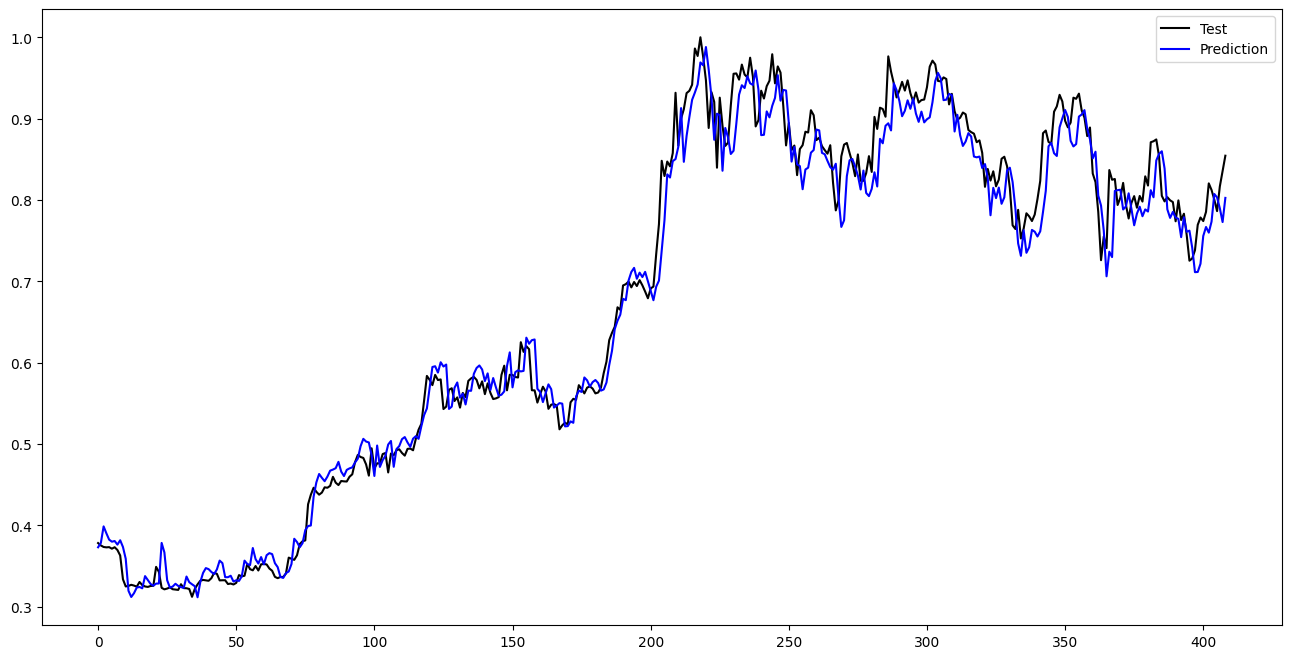

In [33]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'blue', label = 'Prediction')
plt.legend()
plt.show()